In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
import scipy.stats as stats

Data_Files =pd.read_csv("survey_results_public.csv", encoding ='utf-8')

Education_df = Data_Files

Education_df.head(5)



/Users/marylugranja/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [3]:
Education_df['FormalEducation'] = Education_df['FormalEducation'].replace({"Professional degree (JD, MD, etc.)": "Professional Degree",
                                                                          "Bachelor’s degree (BA, BS, B.Eng., etc.)": "Bachelor’s Degree",
                                                                          "Master’s degree (MA, MS, M.Eng., MBA, etc.)" : "Master's Degree",
                                                                        "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)":"Secondary School",
                                                                           "Associate degree" : "Associate Degree",
                                                                          "Other doctoral degree (Ph.D, Ed.D., etc.)": "Other Doctoral Degree", 
                                                                           "I never completed any formal education": "Never Completed Any Formal Education",
                                                                          "Primary/elementary school": "Elementary school",
                                                                          "Some college/university study without earning a degree":"Some College/University Study"})
                           

#Education_df['FormalEducation'].count()
Education_df['FormalEducation'].value_counts()



Bachelor’s Degree                       43659
Master's Degree                         21396
Some College/University Study           11710
Secondary School                         8951
Associate Degree                         2970
Other Doctoral Degree                    2214
Elementary school                        1656
Professional Degree                      1447
Never Completed Any Formal Education      700
Name: FormalEducation, dtype: int64

In [4]:
Education_df['UndergradMajor'] = Education_df['UndergradMajor'].replace({"A health science (ex. nursing, pharmacy, radiology)": "Health Science",
                                                                          "Fine arts or performing arts (ex. graphic design, music, studio art)": "Fine Arts/Performing Arts",
                                                                          "A social science (ex. anthropology, psychology, political science)" : "Social Science",
                                                                        "A humanities discipline (ex. literature, history, philosophy)":"Humanities Discipline",
                                                                           "A business discipline (ex. accounting, finance, marketing)" : "Business Discipline",
                                                                          "Mathematics or statistics": "Mathematics or statistics", 
                                                                           "A natural science (ex. biology, chemistry, physics)": "Natural Science",
                                                                          "Information systems, information technology, or system administration": "Information Systems/Information Technology",
                                                                          "Another engineering discipline (ex. civil, electrical, mechanical)":"Another Engineering Discipline",
                                                                        "Computer science, computer engineering, or software engineering": "Computer Science/Computer Engineering"})
                           

#Education_df['UndergradMajor'].count()
Education_df['UndergradMajor'].value_counts()


Computer Science/Computer Engineering         50336
Another Engineering Discipline                 6945
Information Systems/Information Technology     6507
Natural Science                                3050
Mathematics or statistics                      2818
Web development or web design                  2418
Business Discipline                            1921
Humanities Discipline                          1590
Social Science                                 1377
Fine Arts/Performing Arts                      1135
I never declared a major                        693
Health Science                                  246
Name: UndergradMajor, dtype: int64

In [5]:
# FormalEducation_df = Education_df.groupby('FormalEducation')
# FormalEducation_Count = FormalEducation_df['FormalEducation'].count()
# FormalEducation_sum = FormalEducation_df["FormalEducation"].sum()
# Total_Responses = Education_df['FormalEducation'].count()

# summary_table = pd.DataFrame({"FormalEducation_Count": (FormalEducation_Count)
#                                                       })

# summary_table
# summary_table_reset = summary_table.reset_index()
# summary_sorted = summary_table_reset.sort_values("FormalEducation_Count", ascending = True)
# summary_sorted

In [6]:

# users = summary_sorted["FormalEducation_Count"]
# x_axis = summary_sorted["FormalEducation"]
# plt.barh(x_axis, users, color='blue', alpha=0.5, align="center",)
# #plt.xticks(rotation=90)
# plt.title("Formal Education")
# plt.xlabel("# of Respondents")
# plt.grid(alpha = .25)
# #plt.savefig("../Images/sin_cos_with_markers.png")
# #plt.ylabel("Number of People Using Programming Languages")
# plt.show()#
 

# print(f"Total Responses : {Total_Responses}")


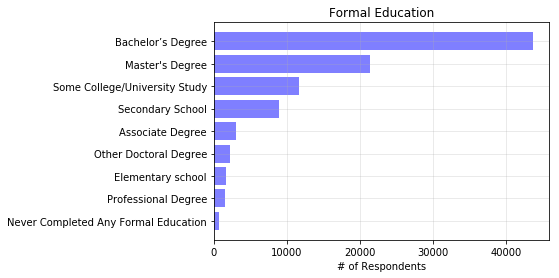

Total Formal Education responses: 94703


,Labels,Values
0,Bachelor’s Degree,43659
1,Master's Degree,21396
2,Some College/University Study,11710
3,Secondary School,8951
4,Associate Degree,2970
5,Other Doctoral Degree,2214
6,Elementary school,1656
7,Professional Degree,1447
8,Never Completed Any Formal Education,700


In [7]:
formaleducation_temp = Education_df[['Respondent','FormalEducation']]
formaleducation = formaleducation_temp.dropna()

formaleducation_count = formaleducation['FormalEducation'].value_counts()

formaleducation_df = pd.DataFrame({'Labels' : formaleducation_count.index,
                            'Values' : formaleducation_count.values   
})

plt.barh(formaleducation_df['Labels'], formaleducation_df['Values'], color='b', alpha=0.5, align="center")
plt.gca().invert_yaxis()
plt.grid(alpha = 0.33)
plt.title("Formal Education")
plt.xlabel("# of Respondents")
plt.savefig("Images/Formal_Education.png")
plt.show()

print(f"Total Formal Education responses: {formaleducation_count.sum()}")
formaleducation_df

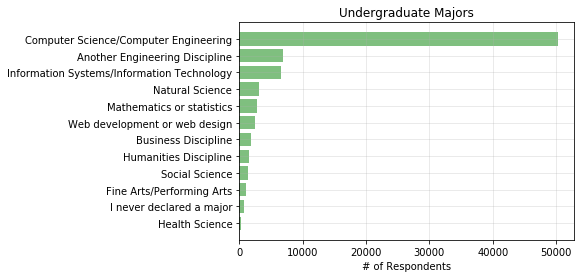

Total Undergraduate Major responses: 79036


,Labels,Values
0,Computer Science/Computer Engineering,50336
1,Another Engineering Discipline,6945
2,Information Systems/Information Technology,6507
3,Natural Science,3050
4,Mathematics or statistics,2818
5,Web development or web design,2418
6,Business Discipline,1921
7,Humanities Discipline,1590
8,Social Science,1377
9,Fine Arts/Performing Arts,1135


In [8]:
UndergradMajor_temp = Education_df[['Respondent','UndergradMajor']]
UndergradMajor = UndergradMajor_temp.dropna()

UndergradMajor_count = UndergradMajor['UndergradMajor'].value_counts()

UndergradMajor_df = pd.DataFrame({'Labels' : UndergradMajor_count.index,
                            'Values' : UndergradMajor_count.values   
})


plt.barh(UndergradMajor_df['Labels'], UndergradMajor_df['Values'], color='green', alpha=0.5, align="center")
plt.gca().invert_yaxis()
plt.grid(alpha = 0.33)
plt.title("Undergraduate Majors")
plt.xlabel("# of Respondents")
plt.savefig("Images/Undergraduate_Majors.png")
plt.show()

print(f"Total Undergraduate Major responses: {UndergradMajor_count.sum()}")
UndergradMajor_df

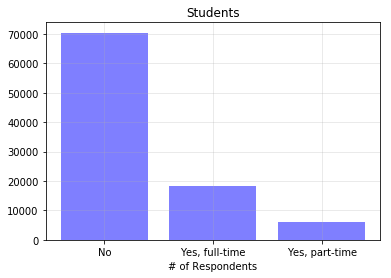

Total Student Responses: 94901


,Labels,Values
0,No,70399
1,"Yes, full-time",18394
2,"Yes, part-time",6108


In [9]:
student_temp = Education_df[['Respondent','Student']]
student = student_temp.dropna()

student_count = student['Student'].value_counts()

student_df = pd.DataFrame({'Labels' : student_count.index,
                            'Values' : student_count.values   
})


plt.bar(student_df['Labels'], student_df['Values'], color='blue', alpha=0.5, align="center")
plt.grid(alpha = 0.33)
plt.title("Students")
plt.xlabel("# of Respondents")
plt.savefig("Images/Students.png")
plt.show()

print(f"Total Student Responses: {student_count.sum()}")
student_df

<function matplotlib.pyplot.show(*args, **kw)>

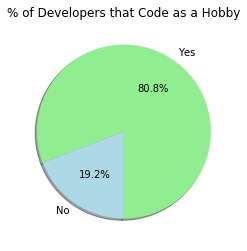

In [10]:
Hobby_Yes_df = Education_df.loc[Education_df["Hobby"] == "Yes", :]
Hobby_No_df = Education_df.loc[Education_df["Hobby"] == "No", :]
No_count = Hobby_No_df['Hobby'].count()
Yes_count = Hobby_Yes_df['Hobby'].count()

labels = ["Yes", "No"]

# The values of each section of the pie chart
sizes = [Yes_count, No_count]

# The colors of each section of the pie chart
colors = ["lightgreen", "lightblue"]


plt.pie(sizes, labels=labels, colors=colors,  autopct="%1.1f%%", shadow=True, startangle=270, )
plt.title("% of Developers that Code as a Hobby")

# Save Figure
plt.savefig("Images/Hobby_Percentage.png")
plt.show



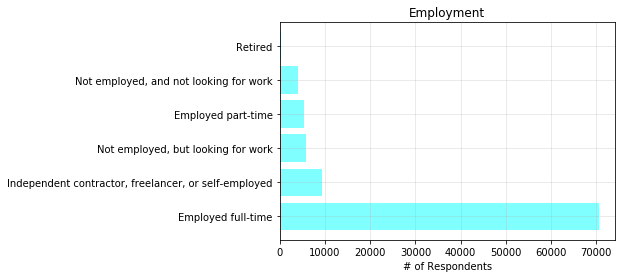

Total Employment Responses: 95321


,Labels,Values
0,Employed full-time,70495
1,"Independent contractor, freelancer, or self-em...",9282
2,"Not employed, but looking for work",5805
3,Employed part-time,5380
4,"Not employed, and not looking for work",4132
5,Retired,227


In [11]:
Employment_temp = Education_df[['Respondent','Employment']]
Employment = Employment_temp.dropna()

Employment_count = Employment['Employment'].value_counts()

Employment_df = pd.DataFrame({'Labels' : Employment_count.index,
                            'Values' : Employment_count.values   
})


plt.barh(Employment_df['Labels'], Employment_df['Values'], color='cyan', alpha=0.5,align="center")
plt.grid(alpha = 0.33)
plt.title("Employment")
#plt.xticks(rotation=90)
plt.xlabel("# of Respondents")
plt.savefig("Images/Employment.png")
plt.show()

print(f"Total Employment Responses: {Employment_count.sum()}")
Employment_df

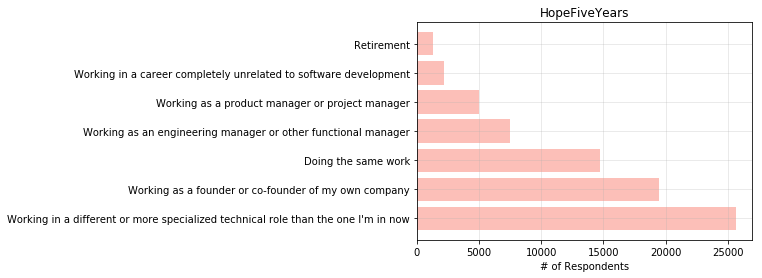

Total Hope Five Years Responses: 75718


,Labels,Values
0,Working in a different or more specialized tec...,25643
1,Working as a founder or co-founder of my own c...,19444
2,Doing the same work,14724
3,Working as an engineering manager or other fun...,7483
4,Working as a product manager or project manager,5004
5,Working in a career completely unrelated to so...,2151
6,Retirement,1269


In [12]:
HopeFiveYears_temp = Education_df[['Respondent','HopeFiveYears']]
HopeFiveYears = HopeFiveYears_temp.dropna()

HopeFiveYears_count = HopeFiveYears['HopeFiveYears'].value_counts()

HopeFiveYears_df = pd.DataFrame({'Labels' : HopeFiveYears_count.index,
                            'Values' : HopeFiveYears_count.values   
})


plt.barh(HopeFiveYears_df['Labels'], HopeFiveYears_df['Values'], color='salmon', alpha=0.5, align="center")
plt.grid(alpha = 0.33)
plt.title("HopeFiveYears")
plt.xlabel("# of Respondents")
plt.savefig("Images/Hope_Five_Years.png")
plt.show()

print(f"Total Hope Five Years Responses: {HopeFiveYears_count.sum()}")
HopeFiveYears_df

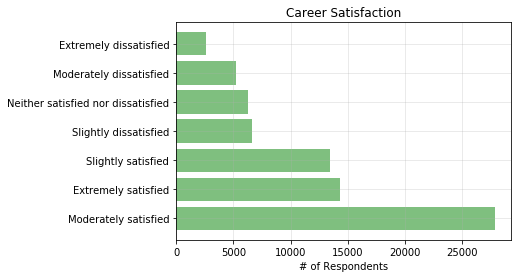

Total Career Satisfaction Responses: 76504


,Labels,Values
0,Moderately satisfied,27926
1,Extremely satisfied,14316
2,Slightly satisfied,13484
3,Slightly dissatisfied,6587
4,Neither satisfied nor dissatisfied,6316
5,Moderately dissatisfied,5262
6,Extremely dissatisfied,2613


In [13]:
CareerSat_temp = Education_df[['Respondent','CareerSatisfaction']]
CareerSat = CareerSat_temp.dropna()

CareerSat_count = CareerSat['CareerSatisfaction'].value_counts()

CareerSat_df = pd.DataFrame({'Labels' : CareerSat_count.index,
                            'Values' : CareerSat_count.values   
})


plt.barh(CareerSat_df['Labels'], CareerSat_df['Values'], color='green', alpha=0.5, align="center")
plt.grid(alpha = 0.33)
plt.title("Career Satisfaction")
plt.xlabel("# of Respondents")
plt.savefig("Images/Career_Satisfaction.png")
plt.show()

print(f"Total Career Satisfaction Responses: {CareerSat_count.sum()}")
CareerSat_df

In [14]:
CareerSatisfaction_df = Education_df
CareerSatisfaction_df["Ratings"] = ""
CareerSatisfaction_df["Hobby_convert"] = ""


def label_rating (row):
      if row["CareerSatisfaction"] == "Extremely dissatisfied":
        return 1
      if row["CareerSatisfaction"] == "Extremely satisfied":
        return 7
      if row["CareerSatisfaction"] == "Moderately dissatisfied":
        return 2
      if row["CareerSatisfaction"] == "Moderately satisfied":
        return 6
      if row["CareerSatisfaction"] == "Neither satisfied nor dissatisfied":
        return 3
      if row["CareerSatisfaction"] == "Slightly dissatisfied":
        return 4
      if row["CareerSatisfaction"] == "Slightly satisfied":
        return 5
      return 0

CareerSatisfaction_df["Ratings"] = CareerSatisfaction_df.apply(lambda row: label_rating(row), axis=1)

def label_hobby (row):
      if row["Hobby"] == "Yes":
        return 1
      if row["Hobby"] == "No":
        return 2
      return 0

CareerSatisfaction_df["Hobby_convert"] = CareerSatisfaction_df.apply(lambda row: label_hobby(row), axis=1)    

CareerSatisfaction_clean_temp = CareerSatisfaction_df
CareerSatisfaction_clean = CareerSatisfaction_clean_temp.dropna(subset=['CareerSatisfaction'], how='all')


In [15]:
CS_Anova_df = CareerSatisfaction_clean[['Respondent','Ratings', 'Hobby_convert']]


In [16]:
CS_group = CS_Anova_df["Ratings"].value_counts()
CS_group

6    27926
7    14316
5    13484
4     6587
3     6316
2     5262
1     2613
Name: Ratings, dtype: int64

In [17]:
group1 = CS_Anova_df[CS_Anova_df["Hobby_convert"] == 1]["Ratings"]
group2 = CS_Anova_df[CS_Anova_df["Hobby_convert"] == 2]["Ratings"]


stats.f_oneway(group1, group2)

F_onewayResult(statistic=154.62562425799004, pvalue=1.8294933058496393e-35)

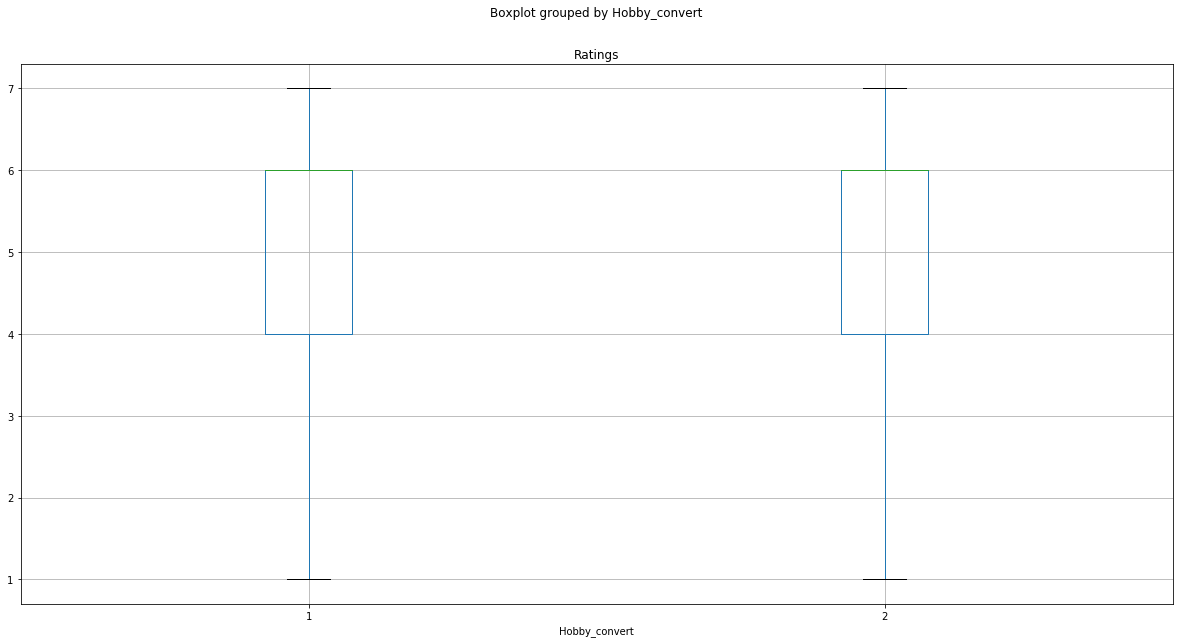

In [18]:
CS_Anova_df.boxplot("Ratings", by="Hobby_convert", figsize=(20, 10))
plt.savefig("Images/Hobby_CSat.png")

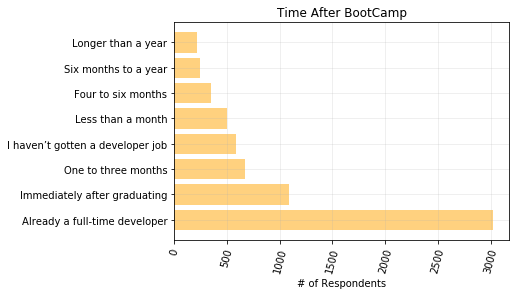

Total TimeAfterBootcamp responses: 6652


,Labels,Values
0,Already a full-time developer,3025
1,Immediately after graduating,1085
2,One to three months,668
3,I haven’t gotten a developer job,581
4,Less than a month,496
5,Four to six months,347
6,Six months to a year,239
7,Longer than a year,211


In [20]:
bootcamp_temp = Education_df[['Respondent','TimeAfterBootcamp']]
bootcamp = bootcamp_temp.dropna()

bootcamp_count = bootcamp['TimeAfterBootcamp'].value_counts()

bootcamp_df = pd.DataFrame({'Labels' : bootcamp_count.index,
                            'Values' : bootcamp_count.values   
})

bootcamp_df['Labels'] = bootcamp_df['Labels'].replace({"I already had a full-time job as a developer when I began the program": "Already a full-time developer"})


plt.barh(bootcamp_df['Labels'], bootcamp_df['Values'], color='orange', alpha=0.5, align="center")
#plt.gca().invert_yaxis()
plt.grid(alpha = .25)
plt.xticks(rotation=75)
plt.title("Time After BootCamp")
plt.xlabel("# of Respondents")
plt.savefig("Images/Time_After_BootCamp.png")
plt.show()

print(f"Total TimeAfterBootcamp responses: {bootcamp_count.sum()}")
bootcamp_df